In [1]:
from numpy import genfromtxt 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import math

In [2]:
df1 = genfromtxt("MultipleLR.csv - MultipleLR.csv.csv",delimiter=',')

In [3]:
df1.shape

(25, 4)

In [4]:
#x = df1.iloc[:, df1.shape[0]].values #Feature matrix
#y = df1.iloc[:, df1.shape[1]].values #Criterion Matrix  #---->if i want to separate from a data set

In [5]:
x_0= (len(df1),1)
x_00=np.ones(x_0)

In [6]:
data= np.concatenate((x_00,df1), axis=1)

In [7]:
data.shape

(25, 5)

In [8]:
X_used=data[::,:(np.shape(data)[1])-1]
y_used=data[:,[(np.shape(data)[1])-1]]

In [9]:
X_used.shape,y_used.shape

((25, 4), (25, 1))

# Batch gradient descent(multi variable)

In [10]:
def Multi_batch_gradient_descent(df, epochs, learning_rate):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    #learning_parameter=0.001
    theta_arr=[]
    hyp=[]
    losses=[]
    iter_list=[]
    #iterations=1000
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        losses.append(loss_fn[0,0])
        gradient=(X_used.T@error)*(1/len(X_used))
        theta=theta-(learning_rate*gradient)
        theta_arr.append(theta) 
        iter_list.append(i)
    return theta,iter_list,losses,hypothesis_fn,y_used

In [11]:
theta,iter_list,losses,hypothesis_fn,y_used=Multi_batch_gradient_descent(df1,1000,0.0001)

In [12]:
theta

array([[0.00289951],
       [0.44203697],
       [0.51777825],
       [1.05569807]])

In [13]:
#theta = np.dot(np.linalg.inv(np.dot(X_used.T,X_used)),np.dot(X_used.T,y_used))

In [14]:
b=r2_score(y_used,hypothesis_fn)
b

0.9886840848834451

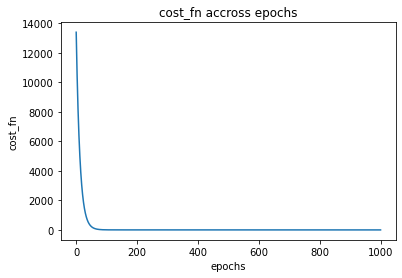

In [15]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,losses)

# Minibatch gradient descent(multi variable) 

In [10]:
def Multi_mini_batch_gradient_descent(df,epochs,batch_size ,learning_rate):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    total_samples =len(X_used)     
    
    for i in range(epochs):
        #random_indices=np.random.shuffle(X_used)#------------------------->shuffle the data
        random_indices=np.random.permutation(total_samples)
        X_tmp = X_used[random_indices]
        y_tmp = y_used[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            hypothesis_fn=X_used@theta
            hyp.append(hypothesis_fn)
            error=hypothesis_fn-y_used
            loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
            loss.append(loss_fn[0,0])
            gradient=(X_used.T@error)*(1/len(X_used))
            theta=theta-(learning_rate*gradient)
            theta_arr.append(theta) 
            iter_list.append(i)
                
            

        
    #return (f' hypothesis={hyp},thta_1={slopes},theta_0={bias},cost_fn={loss},num_iterations={itere}')
    return theta,iter_list,loss,hypothesis_fn,y_used

In [15]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_mini_batch_gradient_descent(df1,100,10,0.00001)

In [16]:
theta

array([[0.00821035],
       [0.65547882],
       [0.65770531],
       [0.71146074]])

In [17]:
b=r2_score(y_used,hypothesis_fn)
b

0.9799309238608654

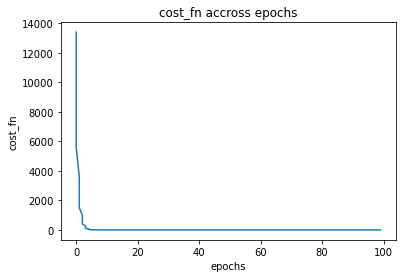

In [18]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# Stochastic gradient descent(multi variable)

In [21]:
def Multi_stochastic_gradient_descent(df,epochs, learning_rate):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    total_samples =len(X_used) 
    for i in range(epochs):    
        random_index = np.random.randint(0,total_samples-1) # random index from total samples
        sample_x = X_used[random_index]
        sample_y = y_used[random_index]
        
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient=(X_used.T@error)*(1/len(X_used))
        theta=theta-(learning_rate*gradient)
        theta_arr.append(theta) 
        iter_list.append(i)
        
    return theta,iter_list,loss,hypothesis_fn,y_used


In [22]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_stochastic_gradient_descent(df1,1000,0.00001)

In [23]:
theta

array([[0.00803216],
       [0.62939475],
       [0.63030113],
       [0.76359252]])

In [24]:
b=r2_score(y_used,hypothesis_fn)
b

0.9820712656233086

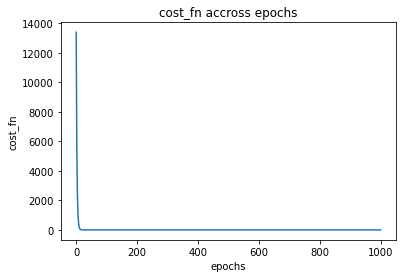

In [25]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# Momentum GD(multivariable)

In [26]:
def Multi_momentum_gradient_descent(df, epochs,learning_parameter,gamma):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    new_change_of_theta=0
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient=(X_used.T@error)*(1/len(X_used))
        new_change_of_theta=(gamma *new_change_of_theta)+(learning_parameter*gradient)
        theta = theta - new_change_of_theta
        theta_arr.append(theta) 
        iter_list.append(i)


    return theta,iter_list,loss,hypothesis_fn,y_used

In [27]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_momentum_gradient_descent(df1,100,0.00001,0.9)

In [28]:
theta

array([[0.00807011],
       [0.63259494],
       [0.63314582],
       [0.7587118 ]])

In [29]:
b=r2_score(y_used,hypothesis_fn)
b

0.9816683783700165

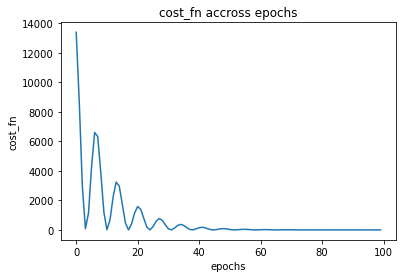

In [30]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# NAG GD(multi variable)

In [31]:
def Multi_NAG_gradient_descent(df,epochs,learning_parameter,gamma):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    vt_=np.zeros((X_updated,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient_theta=1/len(X_used)*(np.dot(np.transpose(X_used),error))
        temp=theta-(gamma*vt_)
        hypothesis_fn_temp=X_used@temp
        error_temp=hypothesis_fn_temp-y_used
        gradient_theta_temp=1/len(X_used)*(np.dot(np.transpose(X_used),error_temp))
        theta=temp-(learning_parameter*gradient_theta_temp)
        vt_=(gamma *vt_)+(learning_parameter*gradient_theta_temp)
        theta_arr.append(theta)
        iter_list.append(i)
        
  
        
    return theta,iter_list,loss,hypothesis_fn

In [32]:
theta,iter_list,loss,hypothesis_fn=Multi_NAG_gradient_descent(data,100,0.00001,0.9)

In [33]:
theta

array([[0.00806511],
       [0.63229272],
       [0.63288103],
       [0.7582546 ]])

In [34]:
b=r2_score(y_used,hypothesis_fn)
b

0.9818409811885168

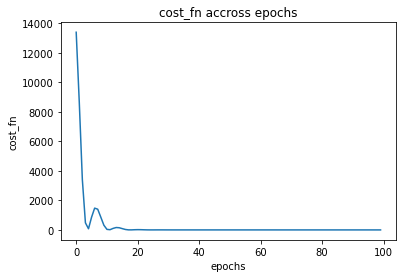

In [35]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# Adagrad(multi variable)

In [36]:
def Multi_Adagrad_fn(df,epochs,learning_parameter,epsilon):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    vt_=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[] 
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient_theta=1/((len(X_used)))*(np.dot(np.transpose(X_used),error)) 
        vt_=vt_+(gradient_theta**2)
        theta=theta-(gradient_theta*((learning_parameter/(np.sqrt(vt_))+epsilon)))
        theta_arr.append(theta)
        iter_list.append(i)
    return theta,iter_list,loss,hypothesis_fn,y_used

In [37]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_Adagrad_fn(df1,100,0.1,1e-9)

In [38]:
theta

array([[0.67103675],
       [0.67072387],
       [0.67056906],
       [0.67410811]])

In [39]:
b=r2_score(y_used,hypothesis_fn)
b

0.9782721800056021

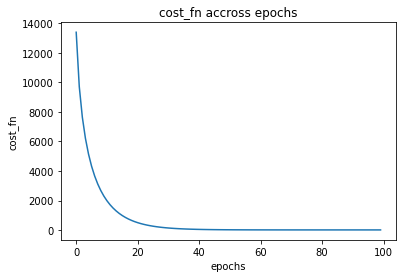

In [40]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# Rmsprop(multi variable)

In [41]:
def Multi_Rmsprop_fn(df,epochs,learning_parameter,beta,epsilon):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    vt_=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient_theta=1/((len(X_used)))*(np.dot(np.transpose(X_used),error))  
        vt_=(beta*vt_)+((1-beta)*(gradient_theta**2))
        theta=theta-(gradient_theta*((learning_parameter/(np.sqrt(vt_))+epsilon)))
        theta_arr.append(theta)
        iter_list.append(i)

    return theta,iter_list,loss,hypothesis_fn,y_used

In [42]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_Rmsprop_fn(df1,1000,0.001,.9,1e-10)

In [ ]:
theta

In [ ]:
b=r2_score(y_used,hypothesis_fn)
b

In [ ]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# ADAM(multi variable)

In [ ]:
def Multi_Adam_fn(df,epochs,learning_parameter,beta,jamma,epsilon):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    vt_=np.zeros((X_updated,1))
    mt_=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]  
    for i in range(epochs):
        hypothesis_fn=X_used@theta
        hyp.append(hypothesis_fn)
        error=hypothesis_fn-y_used
        loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
        loss.append(loss_fn[0,0])
        gradient_theta=1/((len(X_used)))*(np.dot(np.transpose(X_used),error)) 
        mt_=(jamma*mt_)+((1-jamma)*(gradient_theta))
        vt_=(beta*vt_)+((1-beta)*(gradient_theta**2))
        theta=theta-(mt_*((learning_parameter/(np.sqrt(vt_))+epsilon)))
        theta_arr.append(theta)
        iter_list.append(i)

    return theta,iter_list,loss,hypothesis_fn,y_used

In [ ]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_Adam_fn(df1,1000,0.01,0.1,0.1,1e-10)

In [ ]:
theta

In [ ]:
b=r2_score(y_used,hypothesis_fn)
b

In [ ]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

# ADAM with mini batch(multi variable)

In [ ]:
def Multi_Adam_fn_mini_batch(df,epochs,batch_size,learning_parameter,beta,jamma,epsilon):
    X_updated=X_used.shape[1]
    theta=np.zeros((X_updated,1))
    vt_=np.zeros((X_updated,1))
    mt_=np.zeros((X_updated,1))
    #y_true=X_new[:,X_updated].reshape((-1,1))
    theta_arr=[]
    hyp=[]
    loss=[]
    iter_list=[]
    total_samples =len(X_used)     
    
    for i in range(epochs): 
        random_indices=np.random.permutation(total_samples-2)
        X_tmp = X_used[random_indices]
        y_tmp = y_used[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            hypothesis_fn=X_used@theta
            hyp.append(hypothesis_fn)
            error=hypothesis_fn-y_used
            loss_fn=np.dot(np.transpose(error),error)*1/(2*len(X_used))
            loss.append(loss_fn[0,0])
            gradient_theta=1/((len(X_used)))*(np.dot(np.transpose(X_used),error)) 
            mt_=(jamma*mt_)+((1-jamma)*(gradient_theta))
            vt_=(beta*vt_)+((1-beta)*(gradient_theta**2))
            theta=theta-((learning_parameter*mt_/(np.sqrt(vt_)+epsilon)))
            theta_arr.append(theta)
            iter_list.append(i)

    return theta,iter_list,loss,hypothesis_fn,y_used

In [ ]:
theta,iter_list,loss,hypothesis_fn,y_used=Multi_Adam_fn_mini_batch(df1,100,20,0.1,0.9999,0.5,1e-9)

In [ ]:
theta

In [ ]:
b=r2_score(y_used,hypothesis_fn)
b

In [ ]:
plt.title('cost_fn accross epochs')
plt.xlabel('epochs')
plt.ylabel('cost_fn')
plt.plot(iter_list,loss)

In [ ]:
x1=iter_list
y1=losses
plt.plot(x1,y1,label='batch')
x2=iter_list
y2=loss
plt.plot(x2,y2,label='stochastic')
plt.legend()
plt.show()
